<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/Unsupervised_Learning/Practice_Case_Study_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Socio-economic Factors for Geographic Clustering**

-----------------------------------------
## **Context**
-----------------------------------------

The study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the important measures used in one of the popular economic vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

-----------------------------------------
## **Objective**
-----------------------------------------

To identify if there exist various clusters of countries that are more similar to each other than others, in terms of certain socio-economic factors.

------------------------
## **Data Dictionary**
-------------------------
The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita

In the dataset, we will not do clustering on the GDP. We will rather try to understand the variation of other factors with GDP across the groups that we get.

## **Importing the libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DataSci/Week 4 - Data Analysis/MLS2 - Unsupervised Learning/Country-data.csv")

data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### **Checking the info of the data**

In [ ]:
data.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Observations:**

 - There are **167 observations and 10 columns** in the data.
 - All columns have 167 non-null values, i.e., there are **no missing values**.
 - All the **columns except the country name are numerical**.
 - Everything looks great, let's move ahead to check for duplicates.

### **Check duplicate entries**

In [ ]:
data.duplicated()#.sum()

0

In [ ]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


- There are **no duplicate rows** in the data. That's good.

## **Exploratory Data Analysis**

### **Summary Statistics**

<Axes: >

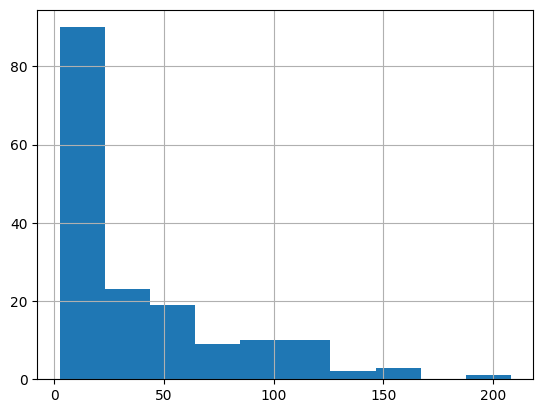

In [ ]:
data.child_mort.hist()

In [ ]:
data.describe()#.T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Observations:**

- The child mortality rate has a high range from 2.6 to 208 deaths per 1000 live births. The average child mortality rate is approx 38 deaths per 1000 live births.
- Similarly, the exports and imports have a high range of values. The maximum values for exports and imports are 200% and 174% of GDP respectively. This can happen if a country's export or import industry exceeds its domestic economy.
- The total spend on health is very less in comparison to exports and imports for the majority of countries. The average spending on health is approx 6.8% of GDP.
- The average life expectancy is approx 70 years but the minimum value is just 32 years.
- Other variables like gdpp, inflation, and income also show a high variability which can be expected as they can be very different for different countries.
- Overall, % expenditure on health and average life expectancy seem to have a lesser standard deviation, which reflects less variability across countries. All other variables seem to have a very high spread across countries. These are the variables that might help us identify the clusters if they exist.

In [ ]:
data['deficit'] = data['imports'] - data['exports']

In [ ]:
data[data.exports>100]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [ ]:
data.sort_values(by=['deficit'], ascending=False).head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,73.50
81,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490,66.60
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,61.60
101,"Micronesia, Fed. Sts.",40.0,23.50,14.20,81.0,3340,3.800,65.4,3.46,2860,57.50
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,49.40
151,Tonga,17.4,12.40,5.07,60.3,4980,3.680,69.9,3.91,3550,47.90
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,43.70
102,Moldova,17.2,39.20,11.70,78.5,3910,11.100,69.7,1.27,1630,39.30
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,35.20
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,34.90


In [ ]:
data.sort_values(by=['life_expec'], ascending=False).head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,-1.4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,-26.0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,-10.7
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,-10.1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1.1
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,1.3
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,2.0
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,-5.5
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,-2.1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1.3


### **Let's check the distribution and outliers for each column in the data**

child_mort
Skew : 1.45
exports
Skew : 2.45
health
Skew : 0.71
imports
Skew : 1.91
income
Skew : 2.23
inflation
Skew : 5.15
life_expec
Skew : -0.97
total_fer
Skew : 0.97
gdpp
Skew : 2.22
deficit
Skew : 0.46


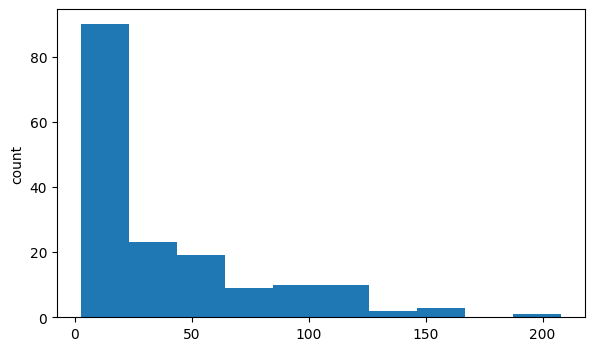

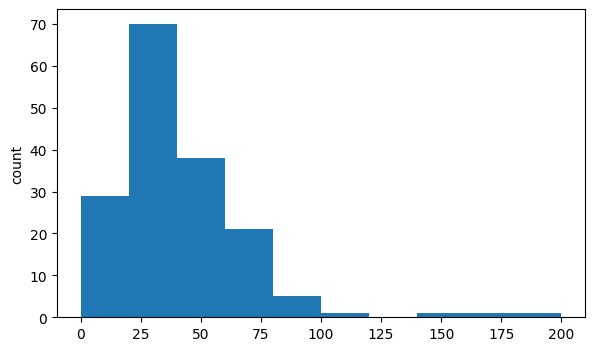

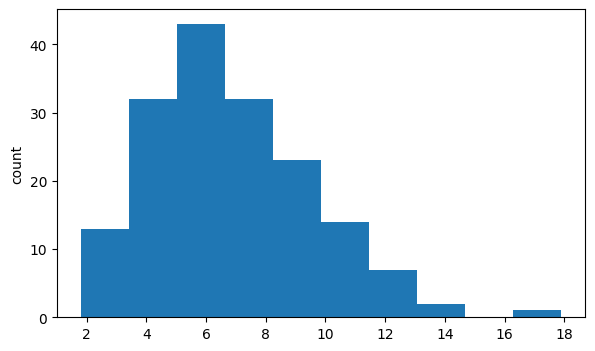

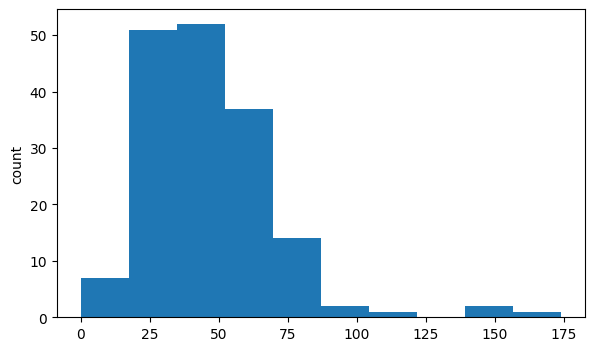

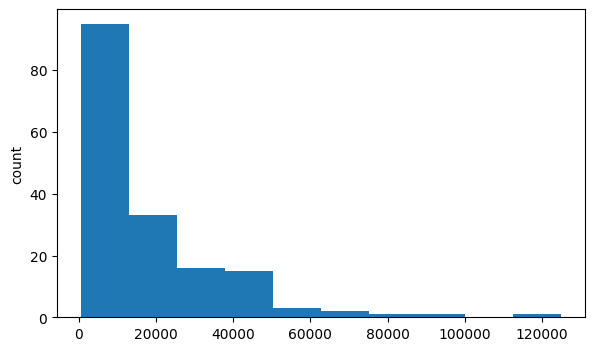

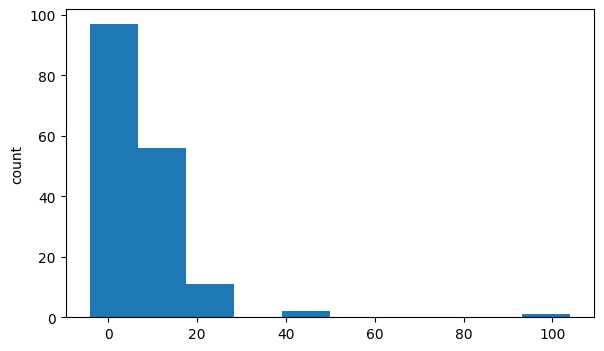

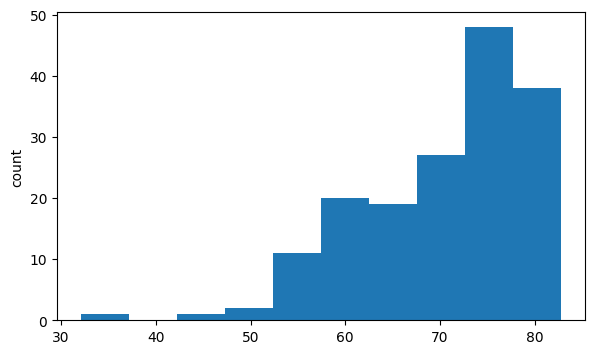

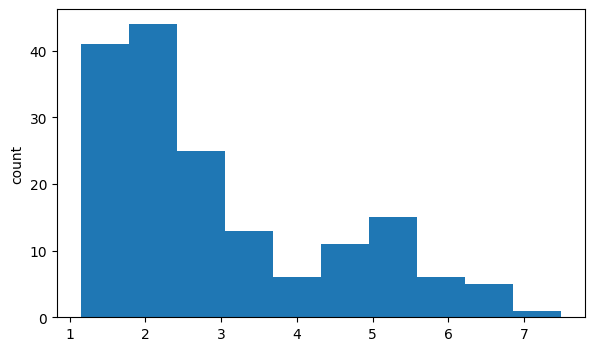

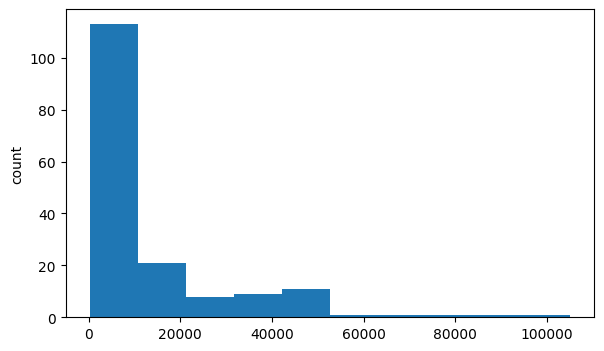

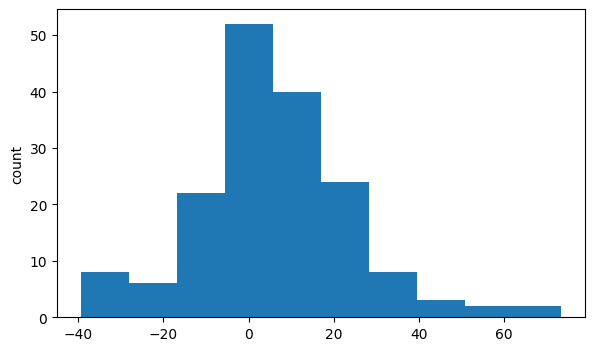

In [ ]:
for col in data.columns[1:]:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

child_mort
Skew : 1.45


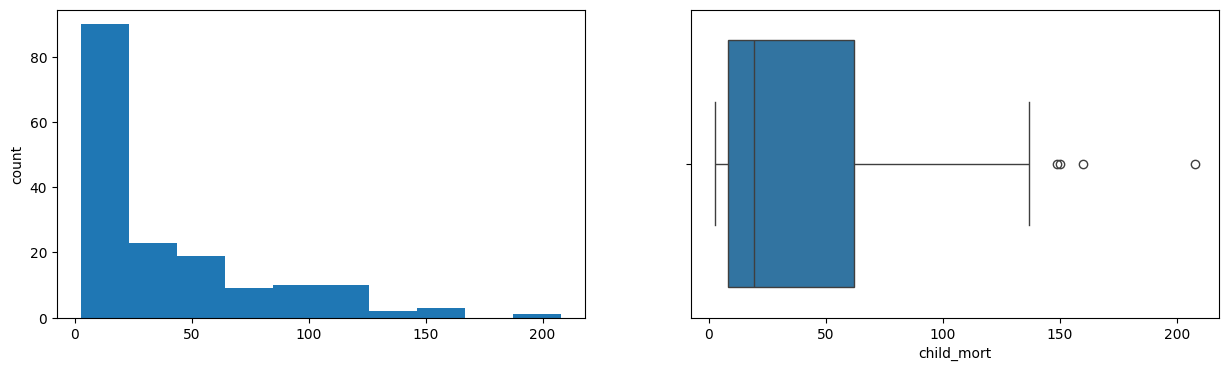

exports
Skew : 2.45


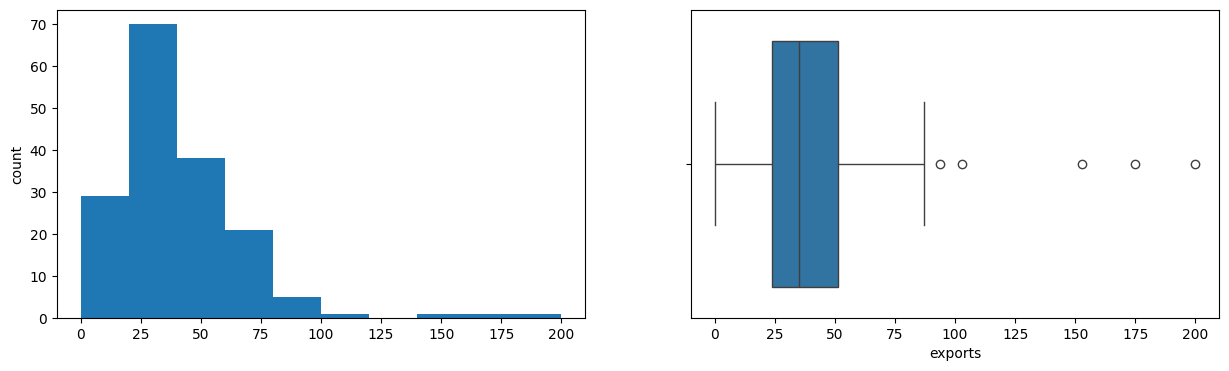

health
Skew : 0.71


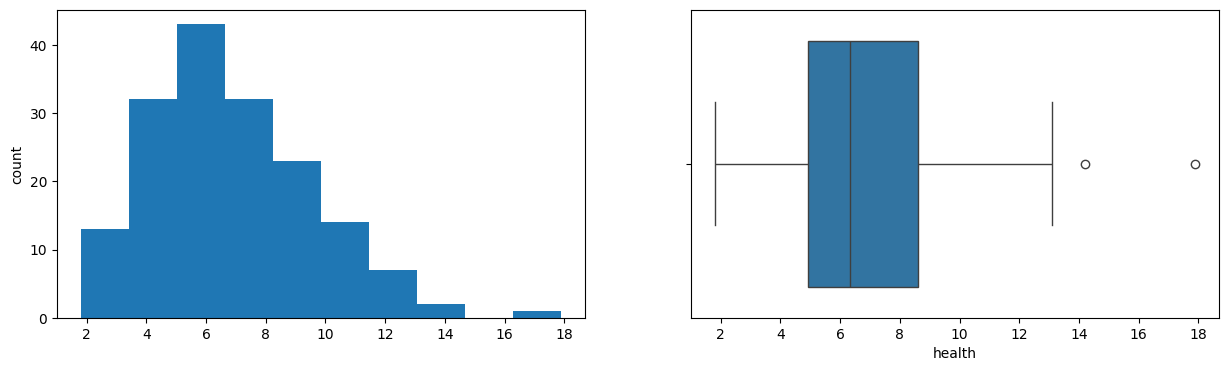

imports
Skew : 1.91


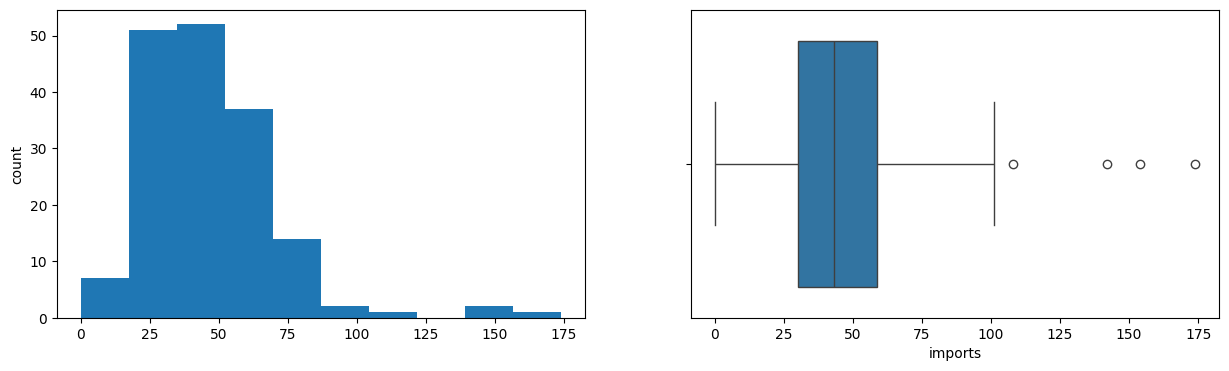

income
Skew : 2.23


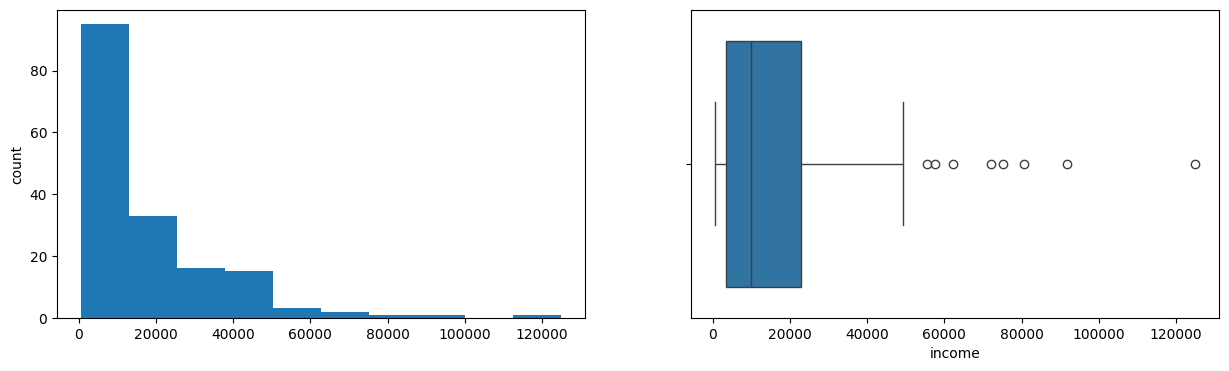

inflation
Skew : 5.15


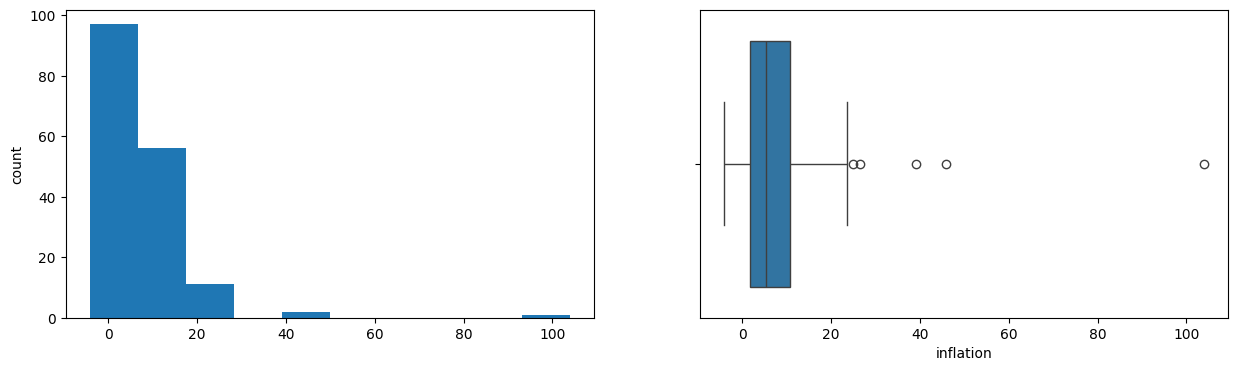

life_expec
Skew : -0.97


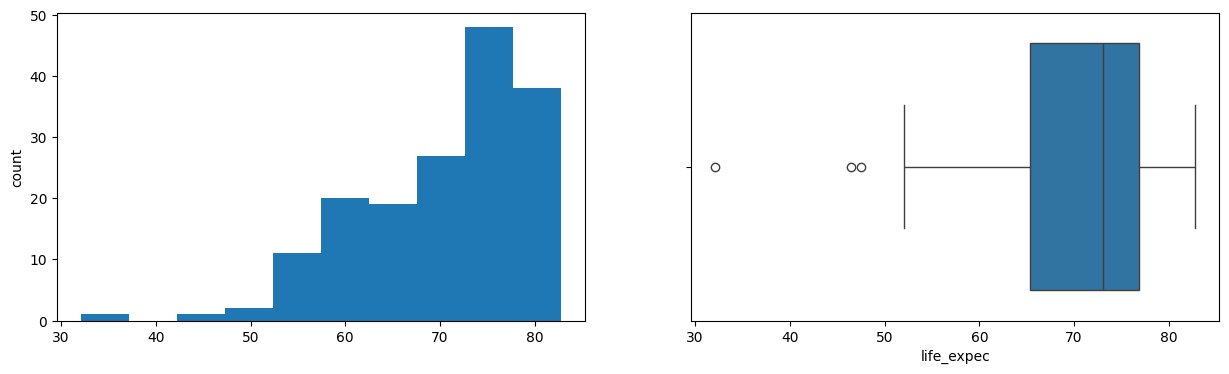

total_fer
Skew : 0.97


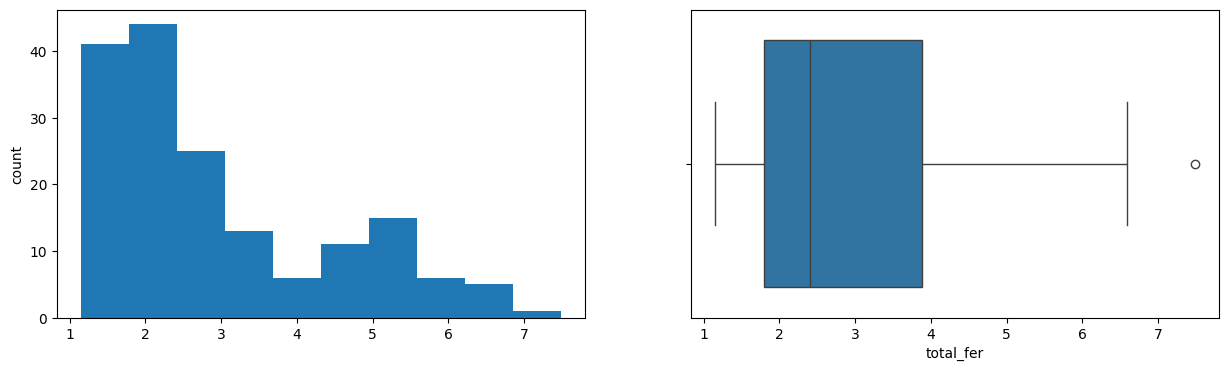

gdpp
Skew : 2.22


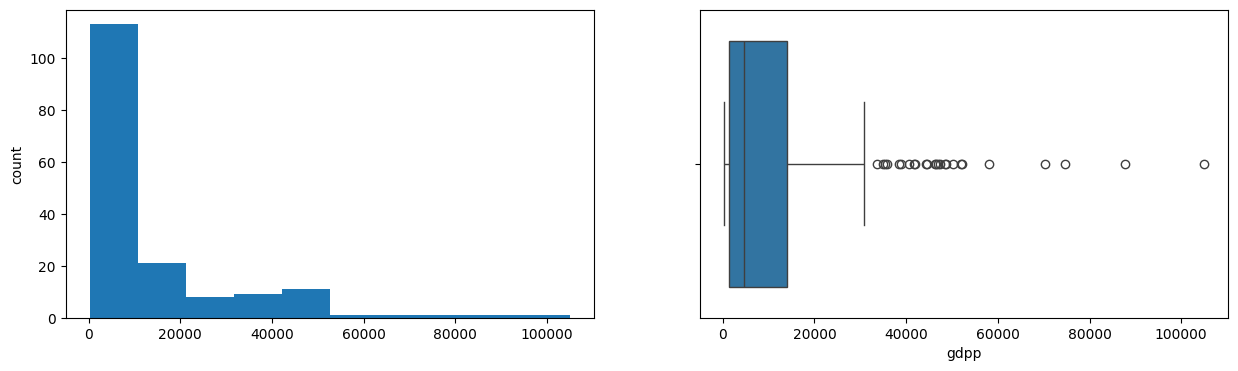

deficit
Skew : 0.46


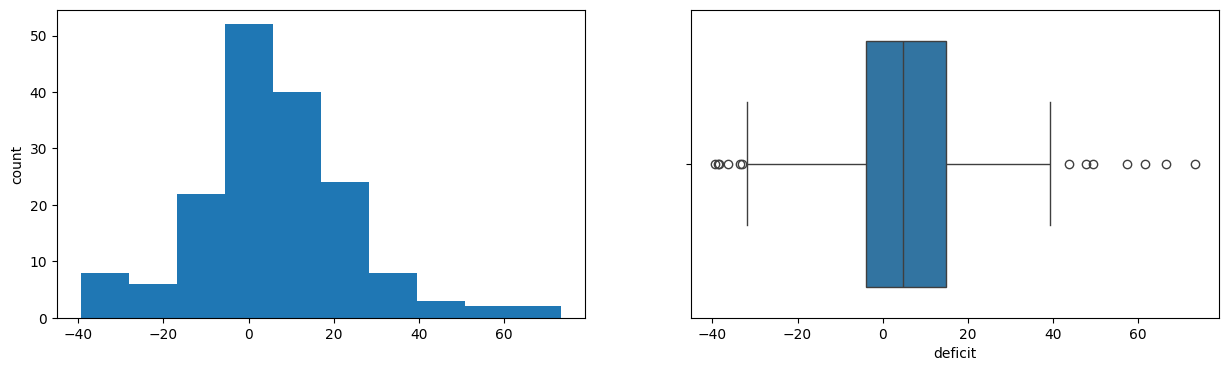

In [ ]:
for col in data.columns[1:]:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:**

- As observed earlier, most of the variables have skewed distributions.
- The distribution for the % expenditure on health is relatively less skewed with fewer outliers.
- The life expectancy is the only variable which is skewed to the left meaning most of the countries have already been successful in achieving high life expectancy.
- The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

### **Let's check the correlation among the variables**

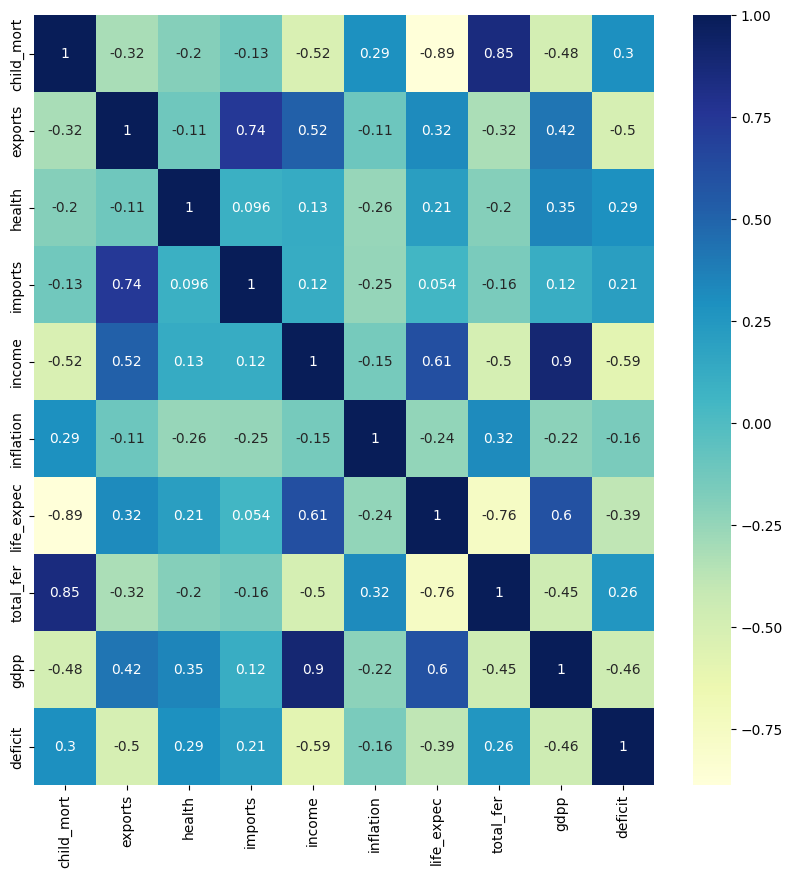

In [ ]:
plt.figure(figsize  = (10, 10))

sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

plt.show()

**Observations:**

- There is a strong positive correlation between gdpp and income. This makes sense.
- The life expectancy is positively correlated with gdpp. This indicates that people live longer in richer countries.
- There is a strong negative correlation between life expectancy and child mortality. This is understandable.
- The child mortality is also seen to have a strong positive correlation with the fertility rate.

## **Scaling the data**

- Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering.
- We will drop the variables `'country'` variable because it is unique for each country and would not add value to clustering.
- We will also drop the `'gdpp'` variable for now, because we want to see if we can identify clusters of countries without relying on GDP and see later if these clusters correspond to an average GDP value for the countries in each cluster.  

In [ ]:
data_new = data.drop(columns = ["country", "gdpp"])

In [ ]:
data_new
#all columns have different units

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,deficit
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,34.9
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,20.6
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,-7.0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,-19.4
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,13.4
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,6.1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,-10.9
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,8.2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,4.4


In [ ]:
# Scaling the data and storing the output as a new DataFrame

#zScale
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns = data_new.columns)

data_scaled.head()
#all data has mean=0, std dev=1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,deficit
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,1.541835
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,0.784652
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.676765
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-1.333344
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,0.403413


In [ ]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)

In [ ]:
data.imports.mean(), data_scaled.imports.mean()

(46.89021497005987, 2.765585498467456e-16)

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 1, n_init = "auto")
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=1)

In [ ]:
#pull data from 2 ccountries
data_scaled.iloc[:2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,deficit
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,1.541835
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,0.784652


In [ ]:
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,deficit
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,1.541835
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,0.784652
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.676765
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-1.333344
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,0.403413
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,0.016878
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,-0.883270
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,0.128073
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.073136


In [ ]:
kmeans.predict(data_scaled.iloc[0:2])

array([0, 1], dtype=int32)

In [ ]:
#sum of square of distances of all points in the cluster
kmeans.inertia_

959.7100309902103

## **K-Means Clustering**

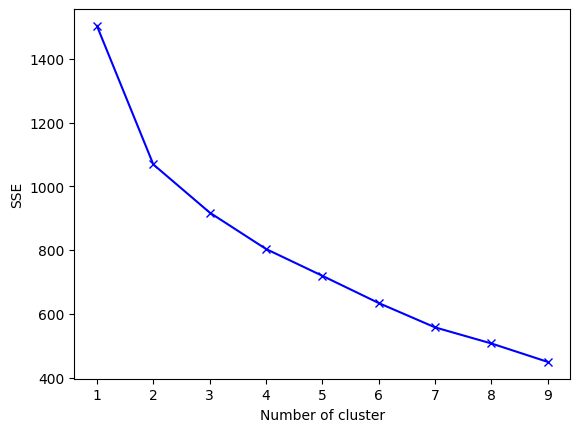

In [ ]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K

#pick different values of K from 1-9, fit w/ data and find it's inertia
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 2 to 8 and there doesn't seem to be a clear 'elbow' here. We may choose any number of clusters from 2 to 8.
- So, let's look at another method to get a 'second opinion'. Let's create a plot with Silhouette scores to see how it varies with K.

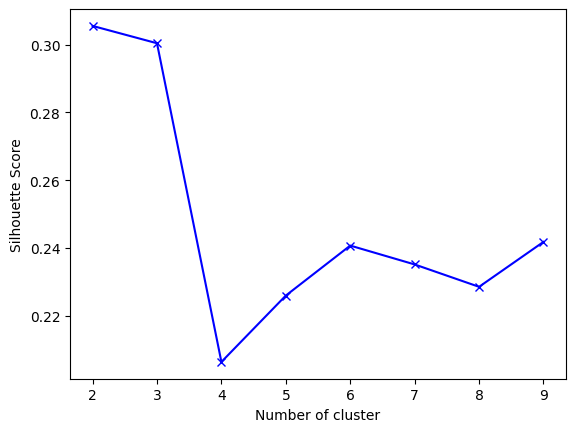

In [ ]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    labels = kmeans.predict(data_scaled)

    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

**Observation:**

- We observe from the plot that the silhouette score is the highest for K=3. Let's first understand these 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data_scaled)

# Adding predicted labels to the original data and the scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [ ]:
data['KMeans_Labels'].value_counts()

1    100
2     55
0     12
Name: KMeans_Labels, dtype: int64

**Observation:**

- This looks like a very skewed clustering, with only three observations in one cluster and more than a hundred in another. Let's check out the profiles of these clusters.

In [ ]:
data.groupby('KMeans_Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit
KMeans_Labels,,,,,,,,,,
0,8.175000,101.750000,4.670000,81.116667,58675.000000,6.47200,78.000000,1.963333,38364.166667,-20.633333
1,15.896000,40.950000,7.314100,44.667000,19437.300000,5.59867,75.309000,2.079900,16002.740000,3.717000
2,85.516364,28.167255,6.377636,43.464835,3915.145455,12.03700,60.289091,4.741091,1897.636364,15.297580


In [ ]:
# Calculating the mean and the median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()

median = data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,8.175000,15.89600,85.516364,8.600,14.000,81.00
exports,101.750000,40.95000,28.167255,82.300,38.050,23.50
health,4.670000,7.31410,6.377636,3.810,6.920,5.44
imports,81.116667,44.66700,43.464835,67.300,43.650,42.70
income,58675.000000,19437.30000,3915.145455,51650.000,15650.000,2090.00
inflation,6.472000,5.59867,12.037000,7.125,3.375,8.92
life_expec,78.000000,75.30900,60.289091,77.650,75.650,60.70
total_fer,1.963333,2.07990,4.741091,2.060,1.930,4.95
gdpp,38364.166667,16002.74000,1897.636364,35150.000,8140.000,988.00
deficit,-20.633333,3.71700,15.297580,-21.550,1.900,12.90


**Observations:**

- It looks like Cluster 2 belongs to high income countries which also have high gdpp.
- Cluster 1 seems to be of low income countries, with low mean gdp as well.
- The remaining countries are in Cluster 0 which also happens to be the biggest cluster. Since the number of developing countries is larger than the group of highly developed countries, this intuitively makes sense.

Let us now visualize the summary statistics of these clusters below.

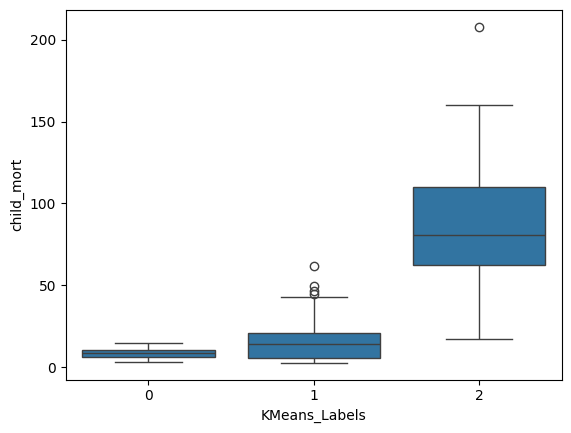

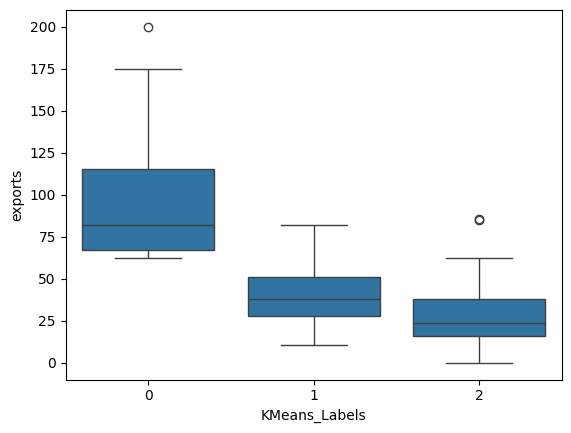

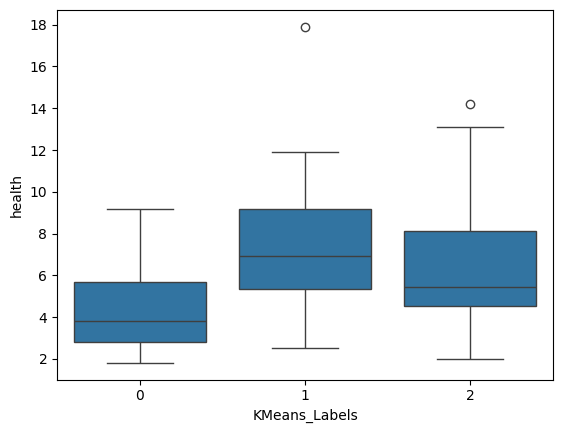

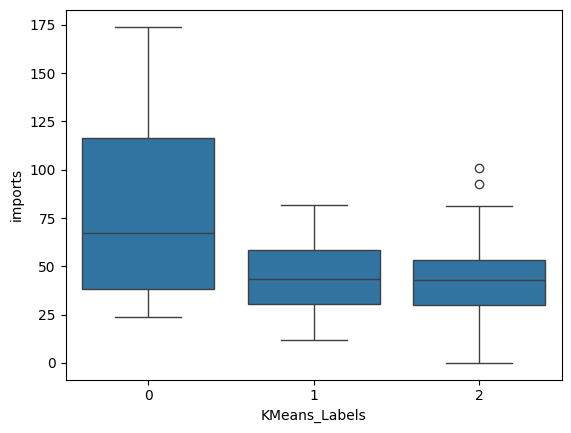

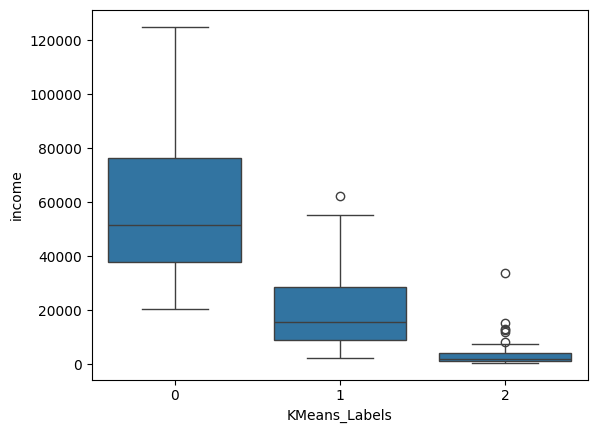

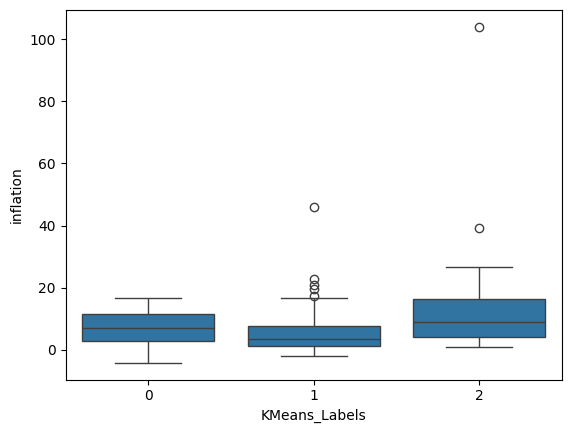

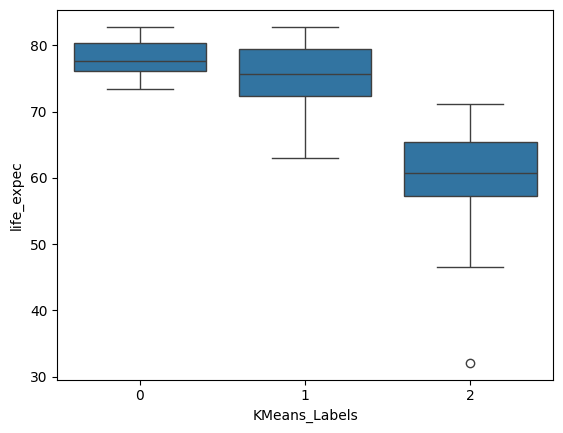

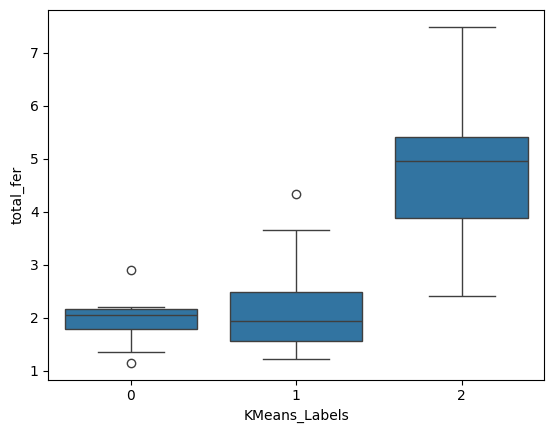

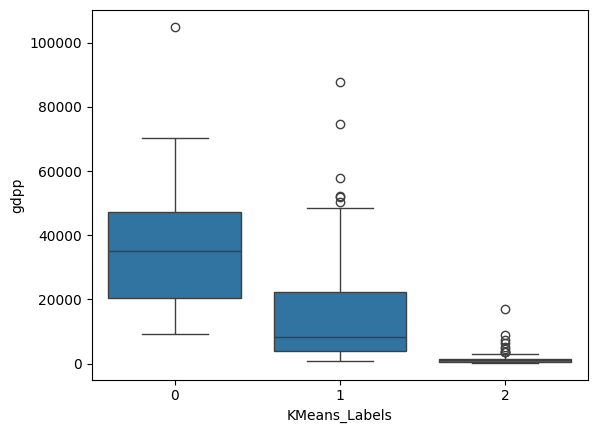

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

**Cluster Profiles:**

- Cluster 2 has only 3 observations. As observed from the scatter plots and the boxplots, this group **consists of outlier high income countries** with the highest percentages of imports and exports in terms of GDP.
- Cluster 1 seems to have countries with less desirable values for many indicators. These countries seem to have the highest inflation rates, the lowest GDP per capita, the lowest exports as well as imports - all signaling a very poor economic situation. These countries also have the highest child mortalities, the highest fertility rates, and the lowest life expectancies. These characteristics are traits of **underdeveloped or developing countries**. These countries also seem to have a trade deficit, i.e., more imports than exports, and as a consequence, may be more reliant on borrowing and lines of credit to finance their economy.
- Cluster 0 is the largest cluster with traits of countries that fall in the **middle of the development spectrum**. These countries have a comparatively better state of affairs than the countries in cluster 1. However, this cluster has a large range of values, indicating that it is a mix of many different types of countries. Ideally, we do not want a cluster to be like this as the fundamental idea behind clustering is to 'group similar things' and this cluster seems to have a lot of 'dissimilarity' within it.
- Overall, this clustering solution does give us good insights into potential clusters of similar countries but is not very useful as it is impacted by outlier countries resulting in one very small cluster and two very big clusters. We should try other algorithms to see if we can do better.

But before that, let's validate if these clusters relate well with the GDP of the country.

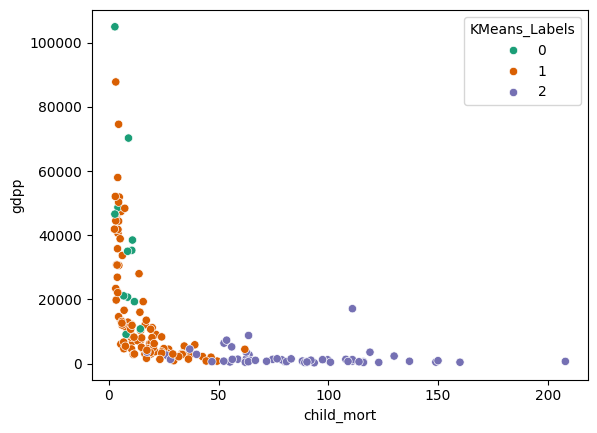

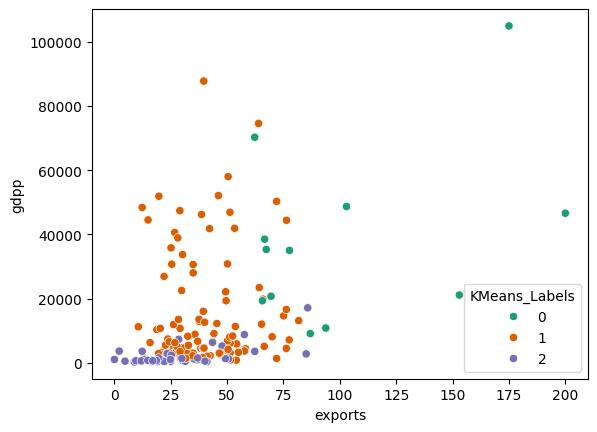

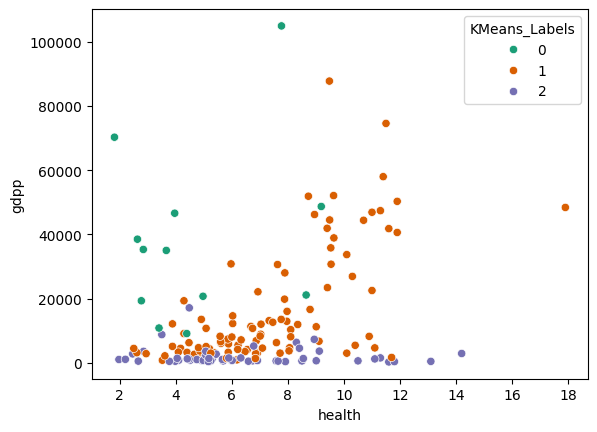

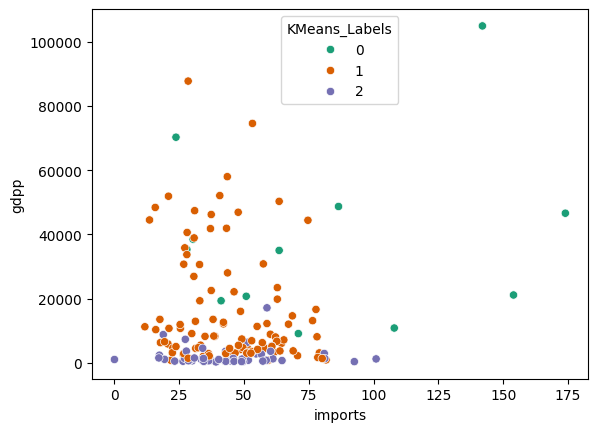

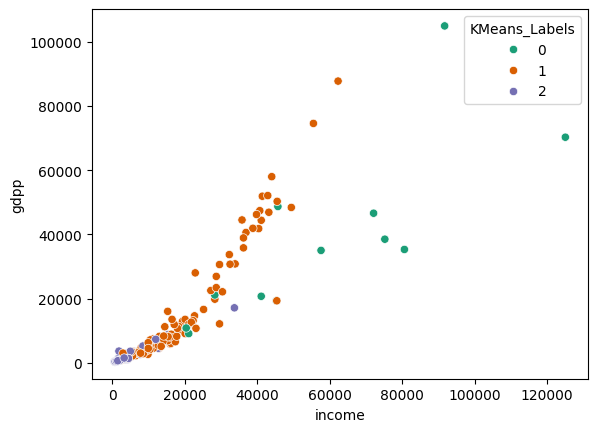

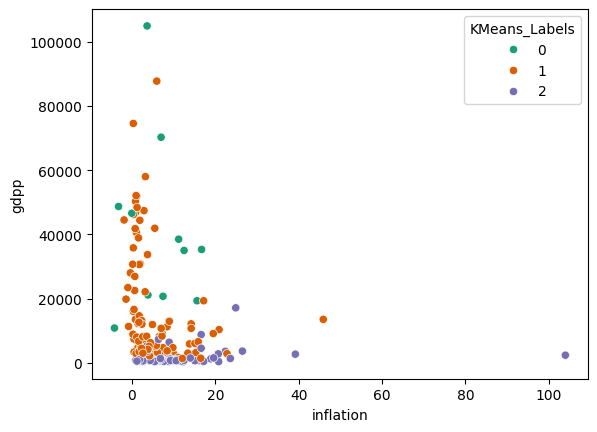

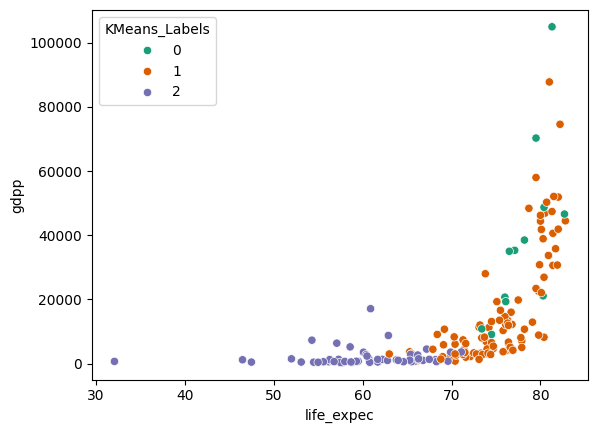

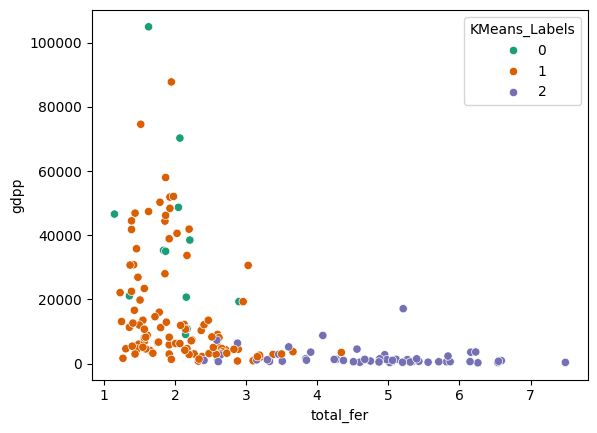

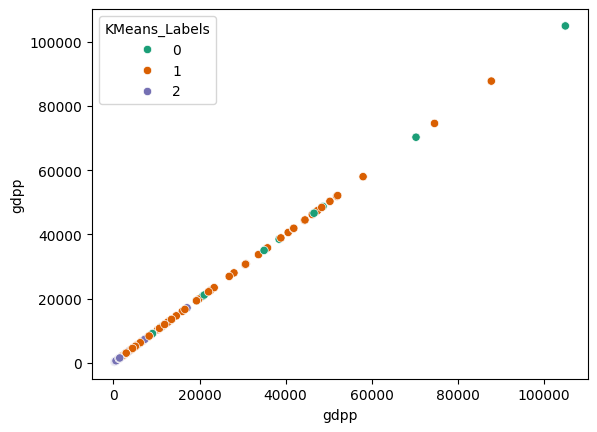

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp', data = data, hue = 'KMeans_Labels', palette = 'Dark2')

    plt.show()

**Observations:**

- The countries with higher fertility rates also seem to have higher populations, corresponding with lower per capita income in these countries.
- The child mortality also seems to be negatively correlated with the GDP of the country. The high child mortality in such countries could be due to several reasons such as high poverty or lower net income per person and a relative lack of health facilities among others.

Let's try another algorithm

## **K-Medoids Clustering**

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)

data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
data.kmedoLabels.value_counts()

1    60
2    57
0    50
Name: kmedoLabels, dtype: int64

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


**Observations:**

- It looks like Cluster 0 belongs to high income countries, Cluster 2 has poorer countries with low incomes, and the remaining countries are in Cluster 1, which happens to be the biggest cluster as well.

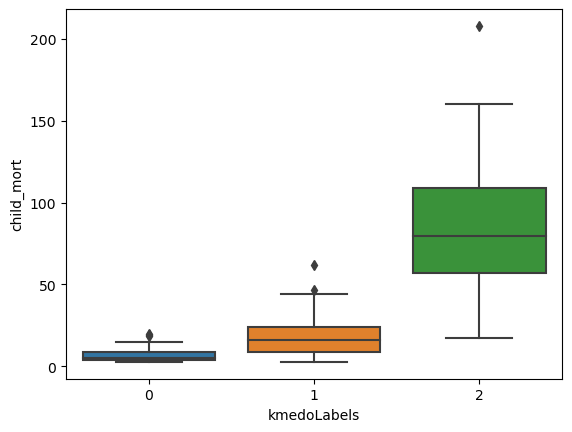

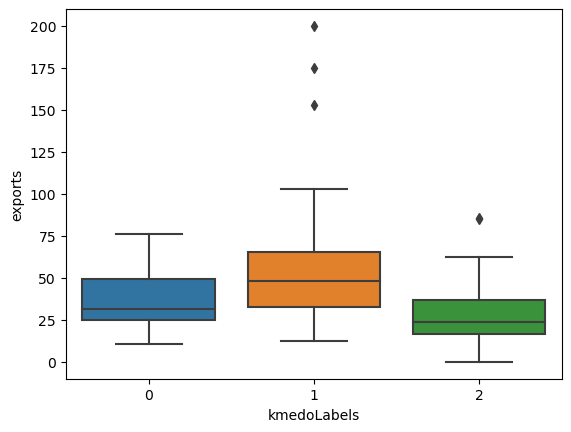

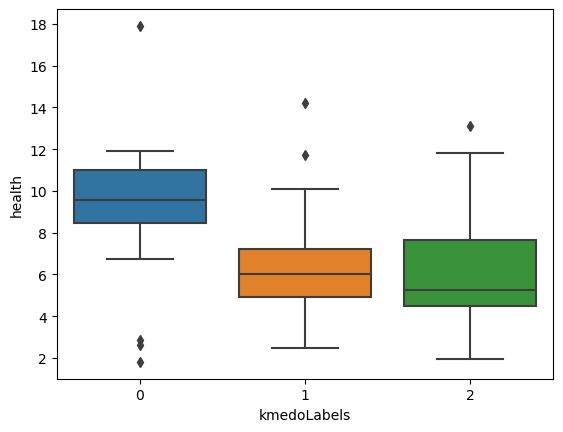

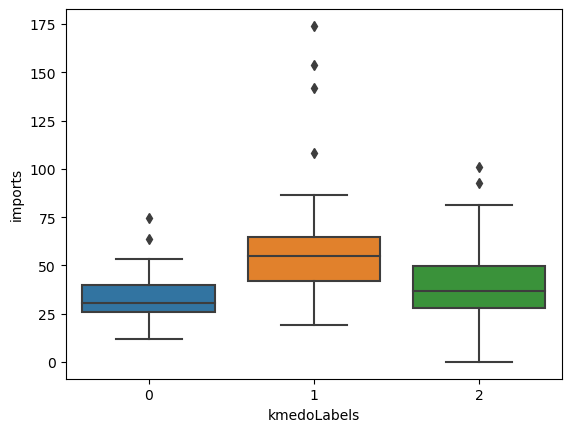

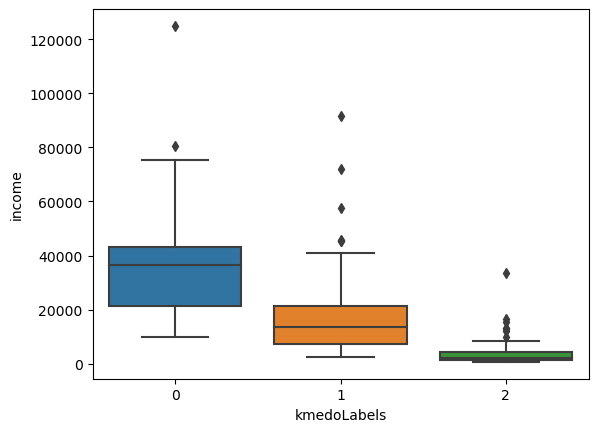

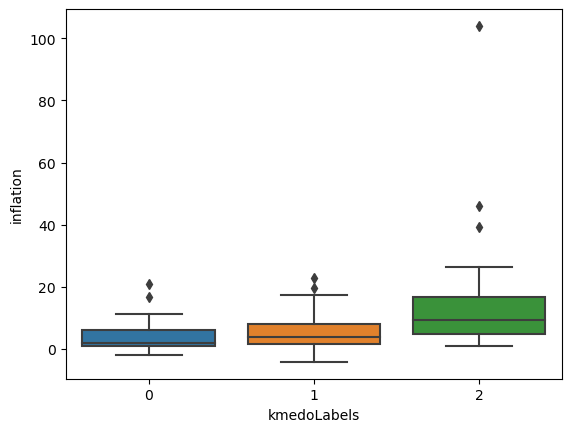

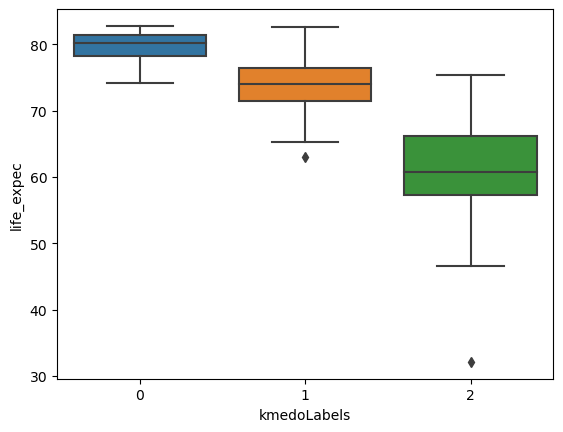

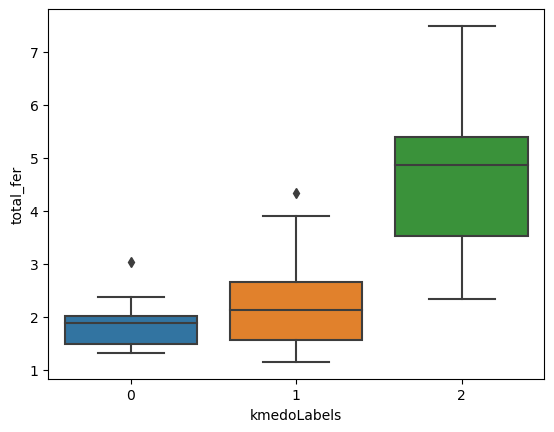

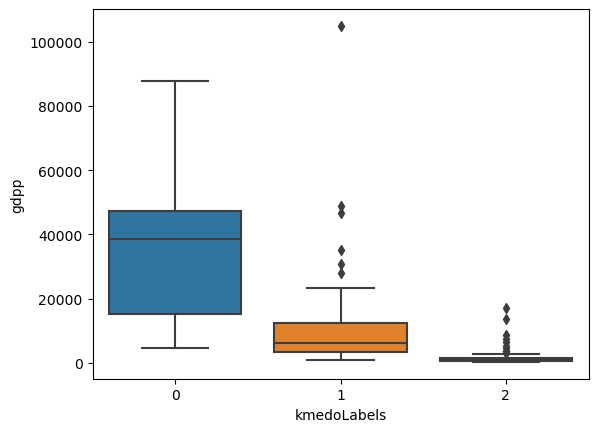

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)

    plt.show()

**Cluster Profiles:**

- Cluster 2 countries have the highest average child mortality rate, trade deficit, inflation rate and least average GDP and net income per person. But the large range of values for different variables implies that cluster 2 contains a variety of countries, from **underdeveloped to developing** ones.
- Cluster 1 shows traits of **developing countries** with comparatively higher GDP, net income per person and significantly lower child mortality rate as compared to cluster 2. The cluster consists of some outliers but majorly it consists of countries with low to medium GDP, with a comparatively higher percentage of imports and exports vs GDP.
- Cluster 0 shows traits of **highly developed countries** with a low child mortality rate and a higher net income per person, life expectancy, and GDP. These countries have the highest average expenditure on health as a percentage of GDP.

**Observations:**

- The number of observations for each cluster from K-Medoids is more evenly distributed in comparison to K-Means clustering.
- This is because the clusters from K_Medoids are less affected by outliers from the data. As we observe, the three outlier countries from K-Means (in terms of imports and exports) are now included in cluster 1 and do not form a separate cluster like in K-Means.
- Unlike in K-Means, the cluster for developed countries is much bigger but still retains the overall characteristics of developed countries, as reflected in the higher values for income per person, life expectancy, and especially in health expenditure as a percentage of GDP.

Now, let's see what we get with Gaussian Mixture Model.

## **Gaussian Mixture Model**

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,34.9,2,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,20.6,1,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-7.0,1,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-19.4,2,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,13.4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,6.1,1,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-10.9,1,1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,8.2,1,2,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4.4,2,0,0


In [ ]:
data.GmmLabels.value_counts()

0    77
1    54
2    36
Name: GmmLabels, dtype: int64

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,70.181818,14.283333,5.994444,62.70,14.50,4.500
exports,31.541545,50.842593,46.972222,28.50,38.95,47.800
health,6.104286,6.701852,8.508056,5.38,6.79,9.445
imports,44.533323,55.157407,39.530556,42.90,51.20,35.050
income,4929.259740,17846.481481,42219.444444,3060.00,14350.00,40100.000
inflation,11.407545,4.815352,4.476556,8.43,3.72,1.755
life_expec,63.112987,75.222222,79.475000,63.80,74.70,80.050
total_fer,4.158312,1.927407,1.890000,4.27,1.83,1.870
gdpp,2334.077922,11830.000000,37401.944444,1310.00,7685.00,37150.000


**Observation:**

- Cluster 1 belongs to high income countries, Cluster 0 belongs to lower income countries, and the rest of the countries are in Cluster 2.

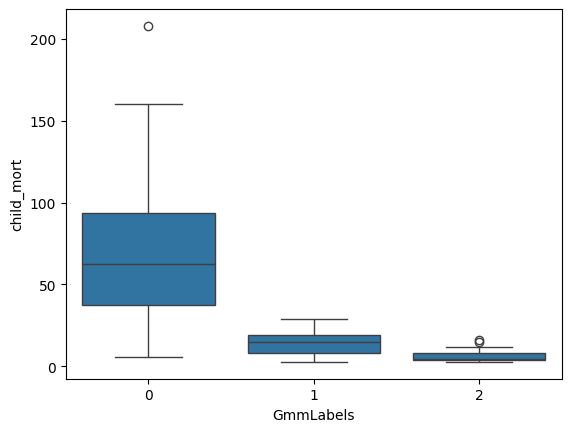

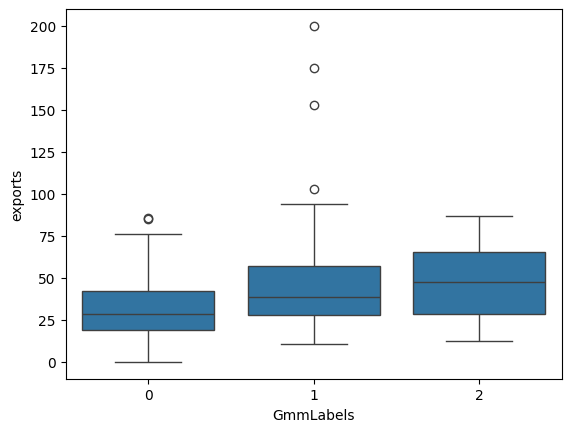

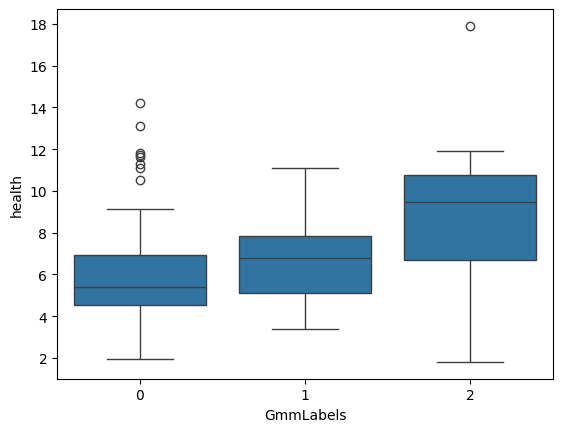

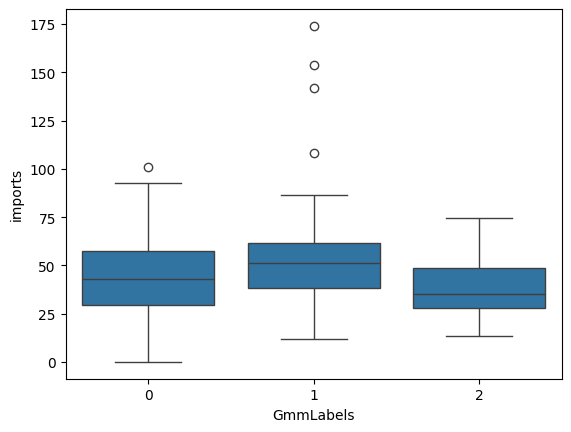

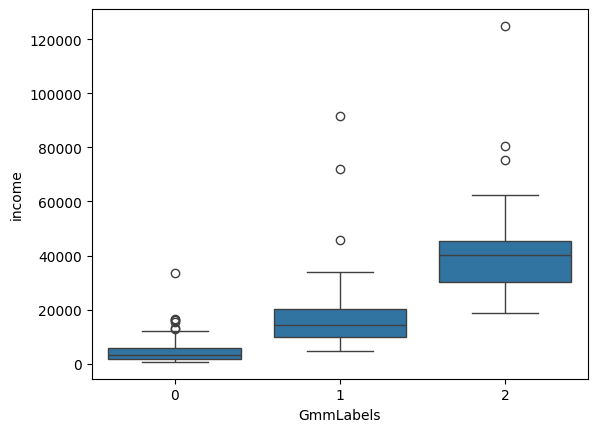

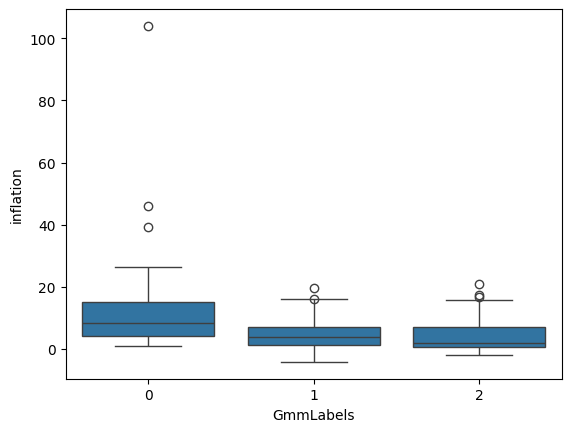

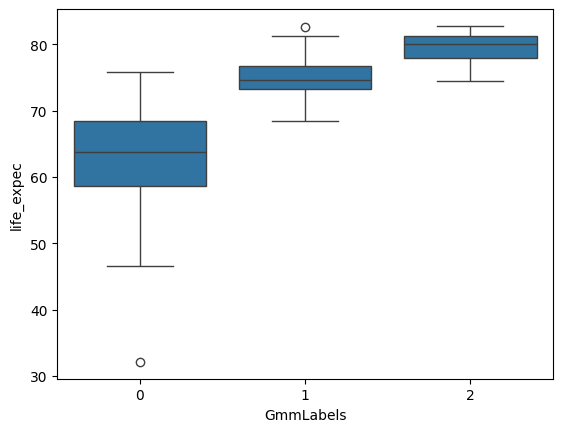

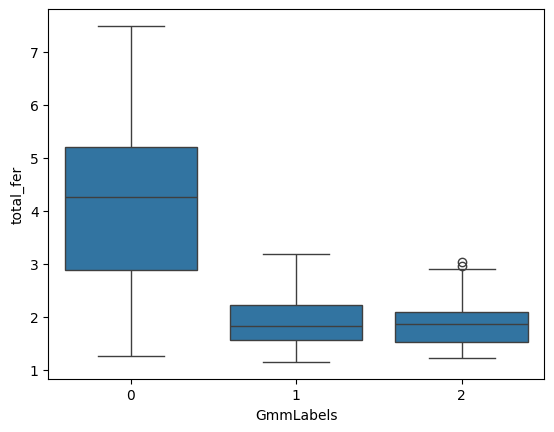

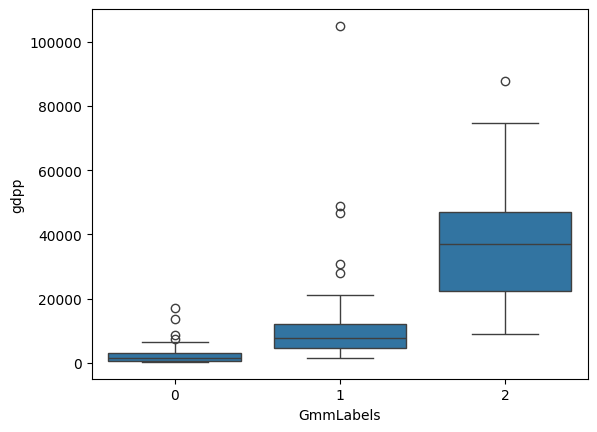

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)

    plt.show()

**Cluster Profiles:**

- This clustering solution looks very similar to the once created using K-Medoids with one cluster of 'high income' countries, one of 'low income' and one of 'all the others'. But on closer inspection, we can identify some important differences in this solution using GMM.

- Cluster 1 seems to be of 'developed' countries but this time the median values for all the key indicators have all improved in comparison to the same cluster obtained from K-Medoids, with a higher GDP per capita, higher income, higher exports and imports and marginally higher life expectancy. At the same time, it has lower inflation rates, lower child mortality rates, and lower fertility as well. Overall, we can say that this cluster has become more 'pure' in comparison to the one from K-Medoids.

- Cluster 0 seems to be of 'underdeveloped' countries but this time the median values for all the key indicators have improved in comparison to the corresponding K-Medoids cluster. For e.g., it has higher GDP per capita, higher income per person, higher exports and imports, and slightly better health expenditure and life expectancy. That means that this cluster of 'underdeveloped' countries has become less 'pure'.

- Both of the above points can give an idea of what might have happened to the third cluster, i.e., Cluster 2. It was a mix of 'underdeveloped' & 'developing' countries and continues to be so, but it has gained some countries on the rich end of the spectrum, and some countries on the 'underdeveloped' end have moved to the last cluster.

Overall, this is a slightly more evenly distributed clustering solution than K-Medoids.

## **Hierarchical Clustering**

- Let's try to create clusters using Agglomerative Hierarchical clustering.
- Here, we decide the number of clusters using a concept called `Dendrogram` which is a tree-like diagram that records the sequences of merges or splits.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

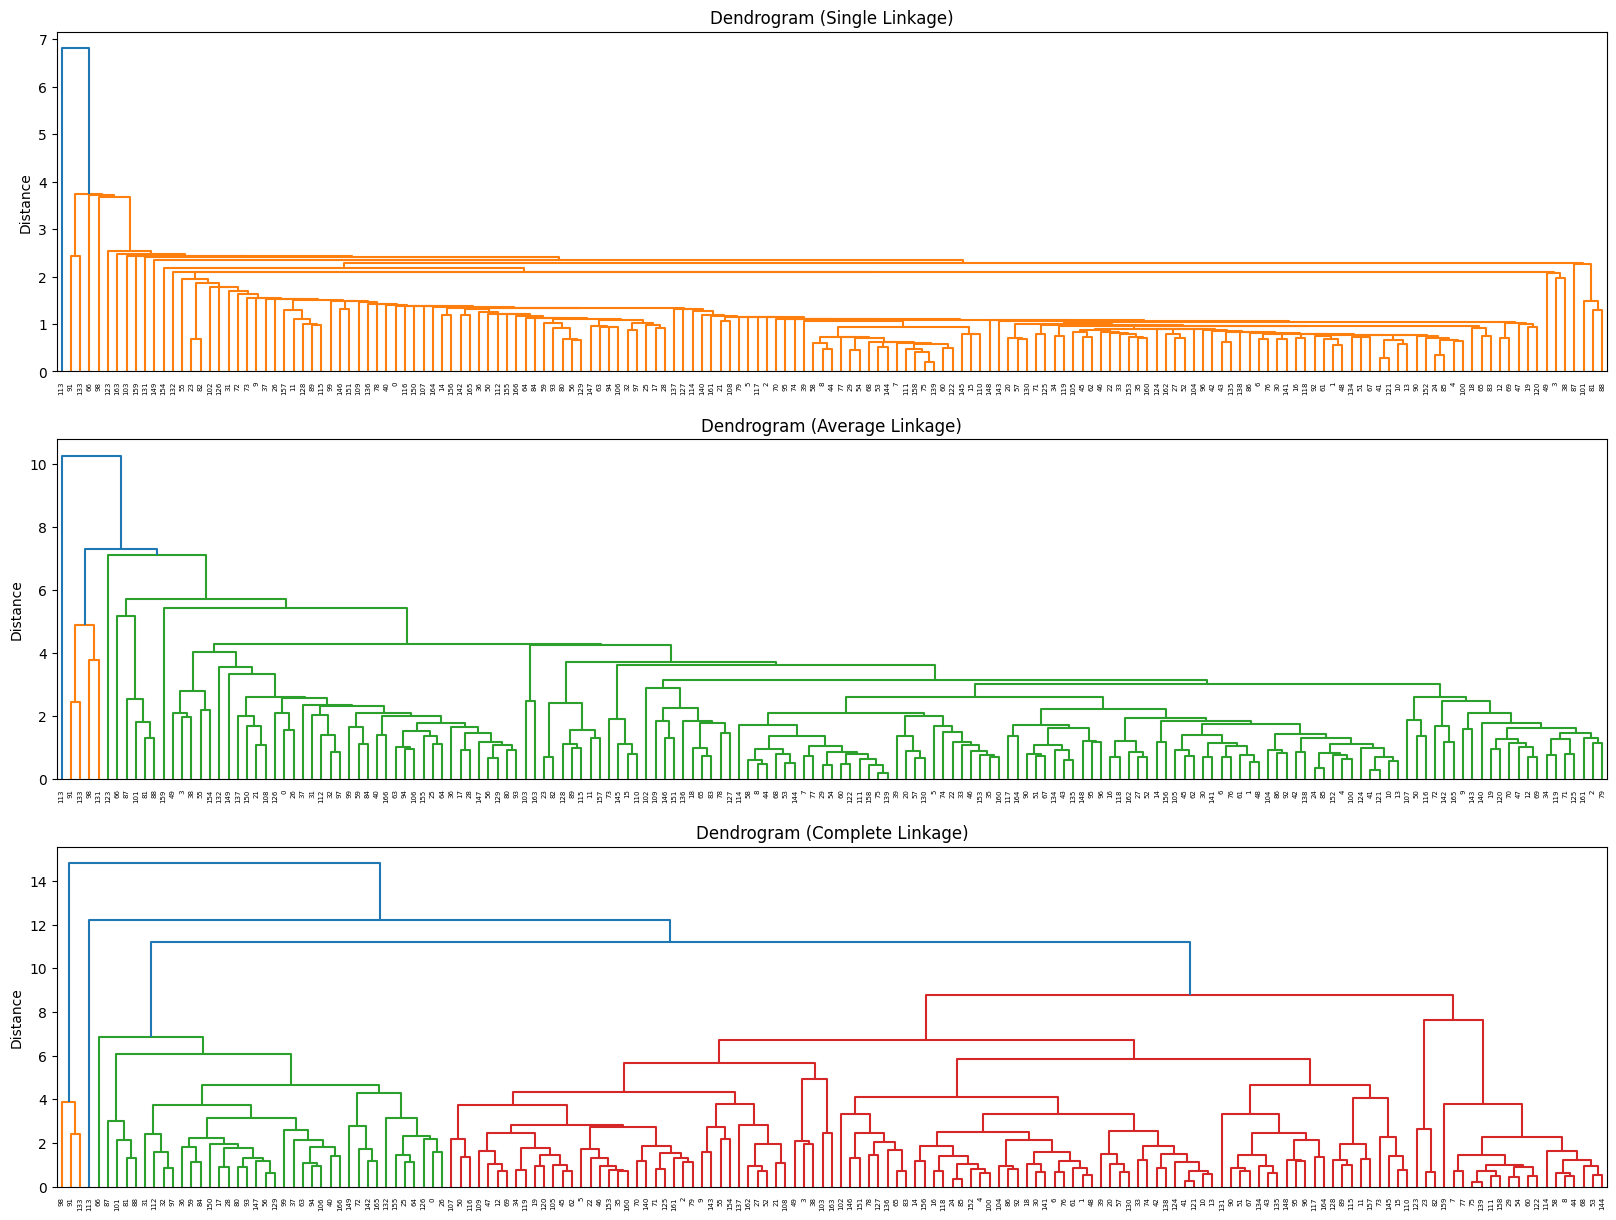

In [ ]:
# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_scaled, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

**Observations:**

- We can see that the complete linkage gives better separated clusters. A cluster is considered better separated if the vertical distance connecting those clusters is higher.
- Now, we can set a threshold distance and draw a horizontal line. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
- The branches of this dendrogram are cut at a level where there is a lot of ‘space’ to cut them, that is where the jump in levels of two consecutive nodes is large
- Here, we can choose to cut it at ~9 since the space between the two nodes is largest.

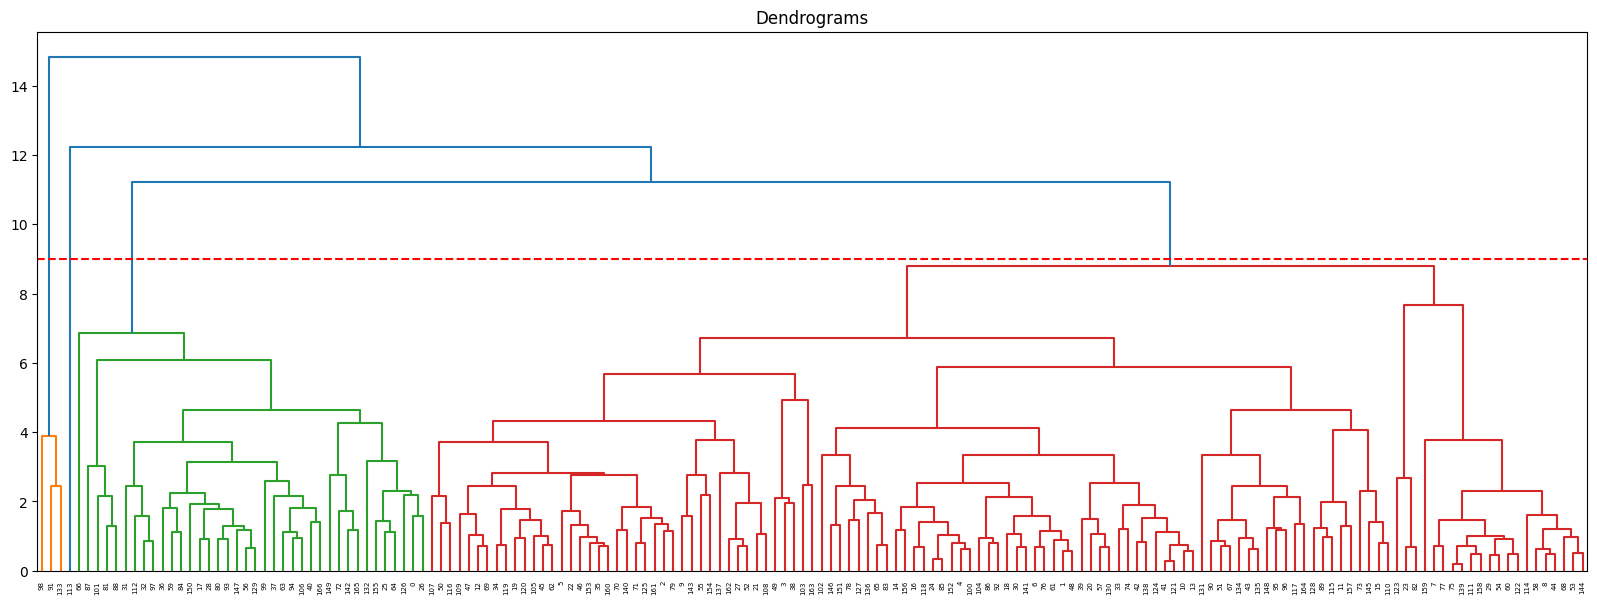

In [ ]:
plt.figure(figsize = (20, 7))

plt.title("Dendrograms")

dend = dendrogram(linkage(data_scaled, method = 'complete'))

plt.axhline(y = 9, color = 'r', linestyle = '--')

**Observations:**

- We can see that the if we create a horizontal line at threshold distance ~ 9, it cuts 4 vertical lines, i.e., we get 4 different clusters.  
- Let's fit the algorithms using 4 as the number of clusters.

In [ ]:
# Clustering with 4 clusters
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

hierarchical.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
data_scaled_copy['HCLabels'] = hierarchical.labels_

data['HCLabels'] = hierarchical.labels_

In [ ]:
data.HCLabels.value_counts()

0    125
1     38
3      3
2      1
Name: HCLabels, dtype: int64

In [ ]:
data[data.HCLabels==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,34.90,2,0,0,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,13.40,2,0,0,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,10.40,2,0,0,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,30.28,2,0,0,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,4.80,2,0,0,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,14.70,2,0,0,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,6.70,2,0,0,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,35.20,2,0,0,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,8.50,2,0,0,1
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,-7.30,2,0,0,1


**Observations:**

- The count of observations in the resulting 4 clusters is unevenly distributed.
- We have two clusters with only 3 countries and 1 country, respectively. Let's check the countries in these clusters.

In [ ]:
# Checking 3 countries in cluster 2
data[data.HCLabels == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,-7.9,2,0,0,2


**Observations:**

- Similar to K-Means, we got a separate cluster for 3 small countries with the highest values for imports and exports - Luxembourg, Malta, Singapore.

In [ ]:
# Checking 1 country in cluster 3
data[data.HCLabels == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,-33.0,0,2,1,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1.0,0,2,1,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,-26.0,0,2,1,3


**Observations:**

- Cluster 3 consists of just one country - Nigeria.
- Nigeria has an inflation rate of 104 which is the highest inflation rate in this dataset. This might have made its distance with the other clusters significantly higher not allowing it to merge with any of those data points.

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('HCLabels').mean()

median = data.groupby('HCLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_hierachical[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,16.678641,75.513333,4.133333,130.00,10.80,73.300,2.80,130.00
exports,42.532806,32.183667,176.000000,25.30,38.70,28.900,175.00,25.30
health,7.013883,6.505667,6.793333,5.07,6.91,5.685,7.77,5.07
imports,42.438504,49.535000,156.666667,17.40,38.40,47.650,154.00,17.40
income,23425.533981,4218.050000,64033.333333,5150.00,17800.00,2500.000,72100.00,5150.00
inflation,6.723262,8.261100,2.468000,104.00,4.49,5.860,3.62,104.00
life_expec,75.471845,61.740000,81.433333,60.50,76.10,61.300,81.30,60.50
total_fer,2.074660,4.477333,1.380000,5.84,1.93,4.710,1.36,5.84
gdpp,18053.689320,2174.233333,57566.666667,2330.00,10700.00,1185.000,46600.00,2330.00


In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('HCLabels').mean()

median = data.groupby('HCLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_hierachical[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,21.092800,95.055263,130.00,4.133333,14.90,90.250,130.00,2.80
exports,42.982232,24.713684,25.30,176.000000,39.70,22.800,25.30,175.00
health,6.764400,7.032105,5.07,6.793333,6.47,5.950,5.07,7.77
imports,45.183727,44.613158,17.40,156.666667,43.70,41.500,17.40,154.00
income,20656.640000,2206.131579,5150.00,64033.333333,15300.00,1695.000,5150.00,72100.00
inflation,6.794936,8.915658,104.00,2.468000,4.49,6.600,104.00,3.62
life_expec,73.860800,59.089474,60.50,81.433333,74.60,59.050,60.50,81.30
total_fer,2.298080,5.133421,5.84,1.380000,2.13,5.155,5.84,1.36
gdpp,15612.512000,1011.052632,2330.00,57566.666667,8000.00,705.000,2330.00,46600.00


**Observations:**

- It looks like Cluster 2 has only 3 countries with high income and high gdpp, Cluster 1 has low income and low gdpp countries, and the rest of the countries are in cluster 0 except for one country which is in cluster 3.

Let's try to visualize the boxplots of different attributes for each cluster to see if we can spot some more granular patterns.

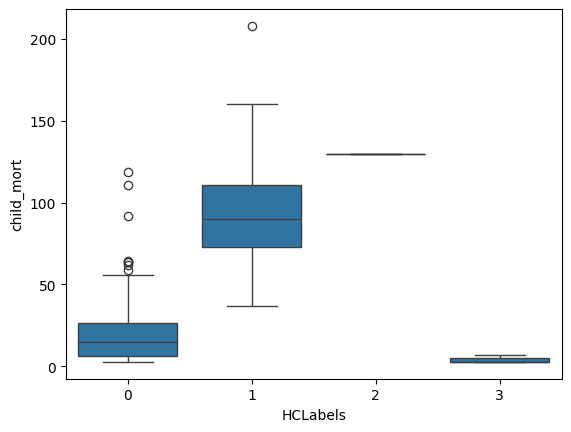

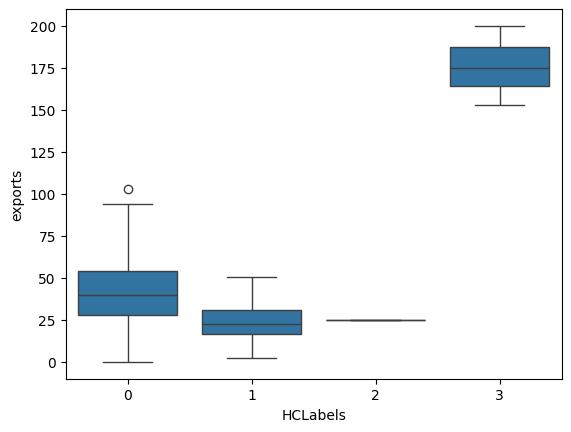

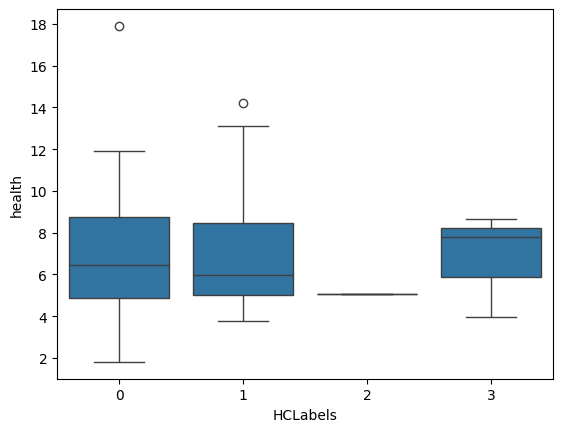

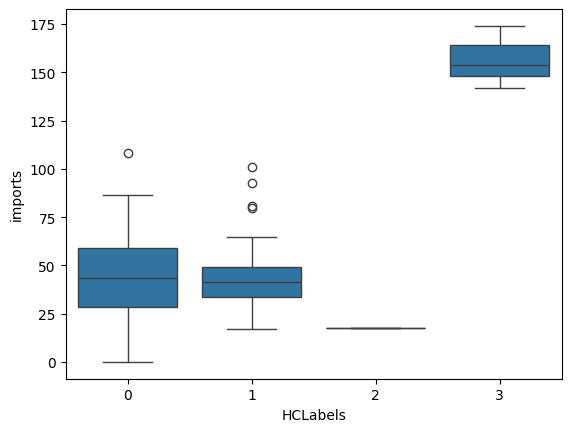

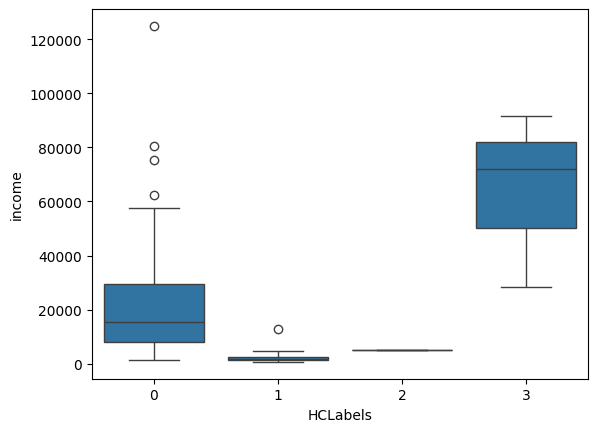

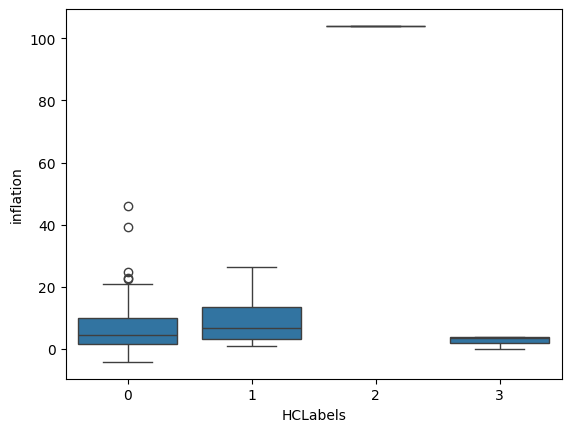

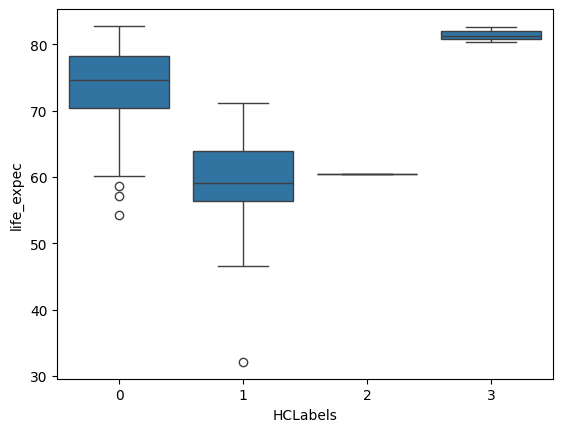

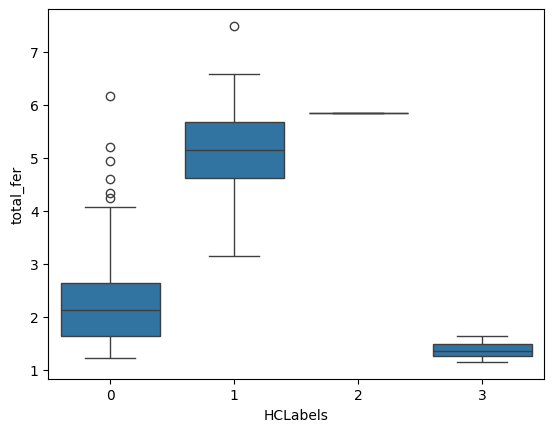

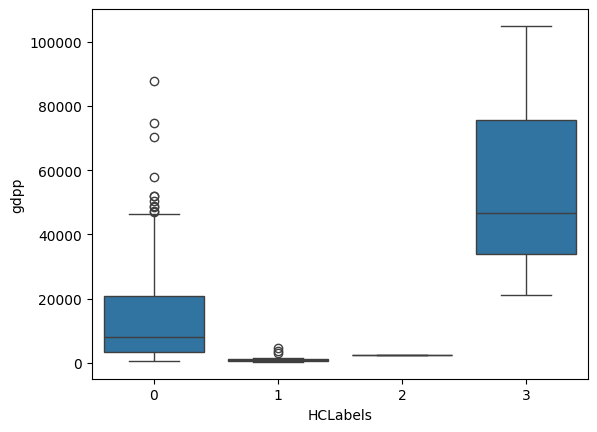

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'HCLabels', y = col, data = data)
    plt.show()


**Observations:**
- The results from hierarchical clustering seem to be difficult to distinguish and comment on especially because of one cluster which contains 103 countries

Let's try to use DBSCAN algorithm

## **DBSCAN**

In [ ]:
#DBSCAN set epsilon and MinPts
dbs = DBSCAN(eps = 1, min_samples = 5)

data_scaled_copy['DBSLabels'] = dbs.fit_predict(data_scaled)

data['DBSLabels'] = dbs.fit_predict(data_scaled)

In [ ]:
#showing all coutries assigned to -1 class, outlier class when eps = 0.5
data['DBSLabels'].value_counts()

-1    110
 0     38
 1     17
 2      2
Name: DBSLabels, dtype: int64

In [ ]:
silhouette_score(data_scaled, data['DBSLabels'])

-0.08315694851322883

In [ ]:
data[data['DBSLabels']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels,DBSLabels
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,20.6,1,1,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,13.4,1,2,1,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,24.5,1,1,1,0,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,8.7,1,1,1,0,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,9.2,1,2,1,0,0
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,-0.7,1,2,1,0,0
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,1.1,1,1,1,0,0
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,2.8,1,2,1,0,0
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,-6.4,1,1,2,0,0
35,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,1.9,1,1,1,0,0


In [ ]:
data[data['DBSLabels']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,deficit,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels,DBSLabels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1.1,1,1,2,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,-3.5,1,2,2,0,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1.9,1,1,2,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,-6.9,1,2,2,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,-1.3,1,1,2,0,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1.3,1,1,2,0,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,-5.2,1,1,2,0,1
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,8.6,1,1,2,0,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,-10.1,1,2,2,0,1
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,2.0,1,1,2,0,1


In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('DBSLabels').mean()

median = data.groupby('DBSLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_hierachical[original_features].T

,group_-1 Mean,group_0 Mean,group_1 Mean,group_2 Mean,group_-1 Median,group_0 Median,group_1 Median,group_2 Median
child_mort,52.100909,14.271053,4.147059,23.6000,41.350,13.500,4.100,23.6000
exports,41.922718,41.994737,35.194118,29.8000,35.000,37.650,29.900,29.8000
health,6.296091,6.896842,10.294706,4.2800,5.410,6.890,10.100,4.2800
imports,48.187872,48.247368,33.982353,59.4500,42.950,48.950,31.000,59.4500
income,14594.118182,15514.736842,38382.352941,7875.0000,5405.000,15300.000,38800.000,7875.0000
inflation,10.499791,3.089184,1.309118,2.4725,7.540,2.355,0.873,2.4725
life_expec,67.196364,75.494737,81.076471,72.0500,68.050,75.750,81.300,72.0500
total_fer,3.501273,1.931316,1.708235,2.3700,3.125,1.790,1.630,2.3700
gdpp,9525.672727,9822.368421,43200.000000,4770.0000,2775.000,8115.000,41900.000,4770.0000


**Observations:**

- DBSCAN returns 4 clusters. The countries in 3 of these clusters have similar profiles to the results seen in the other clustering algorithms - high income, low income and moderately developed countries.
- The country profile of the last cluster (cluster -1) seems uncertain. This cluster has a large difference between the mean values and the median values of various attributes implying the presence of outliers in the cluster.   

Let's visualize the box plots to comment further on these clusters

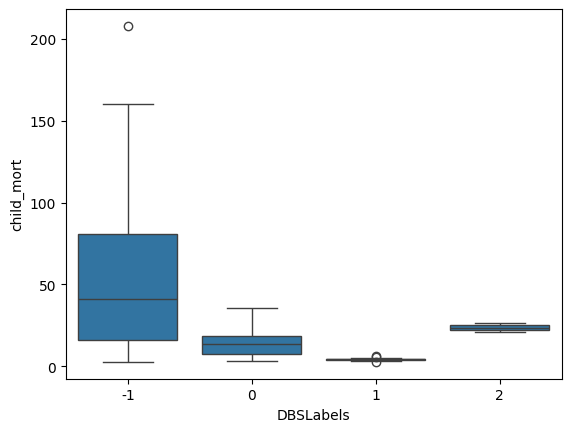

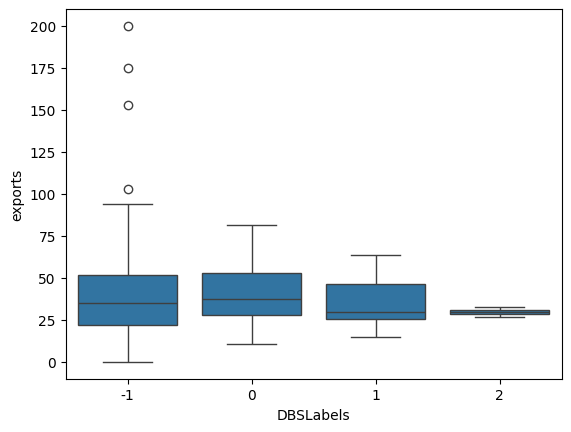

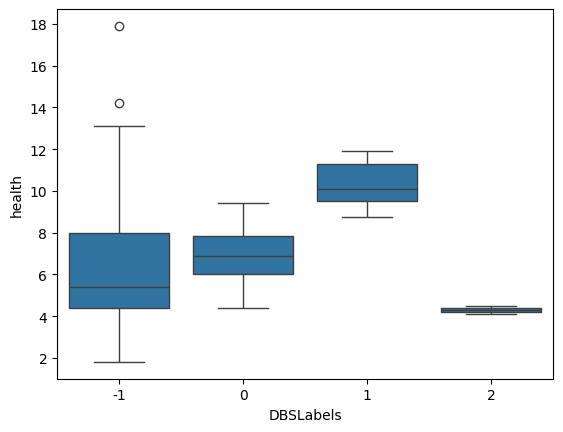

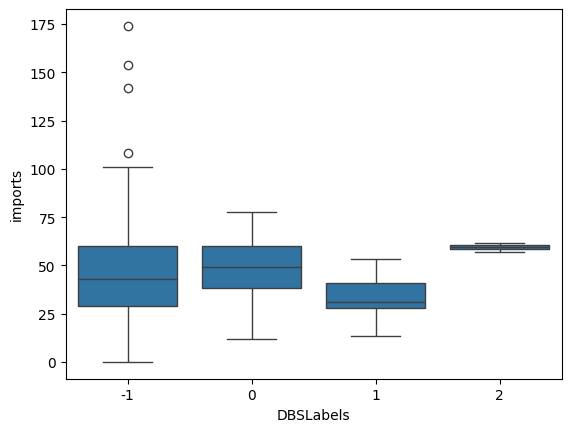

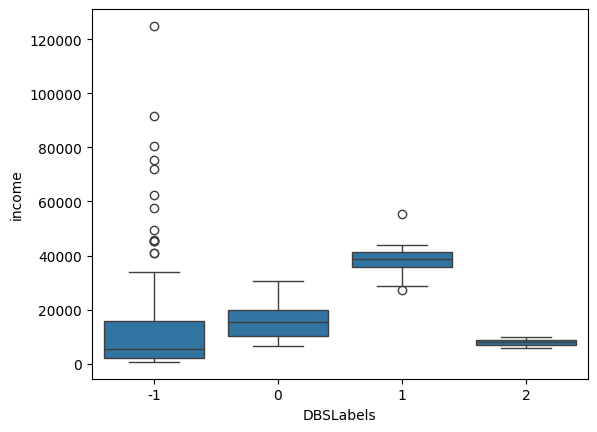

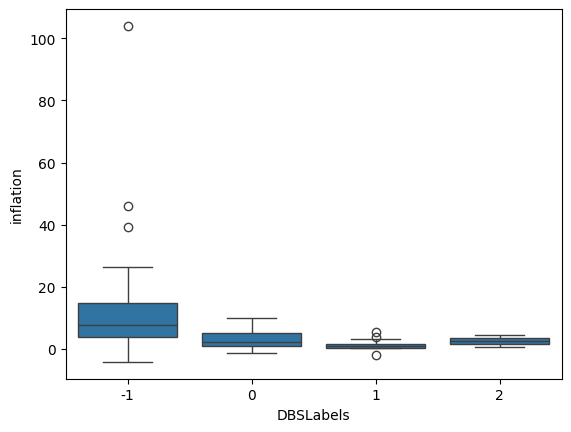

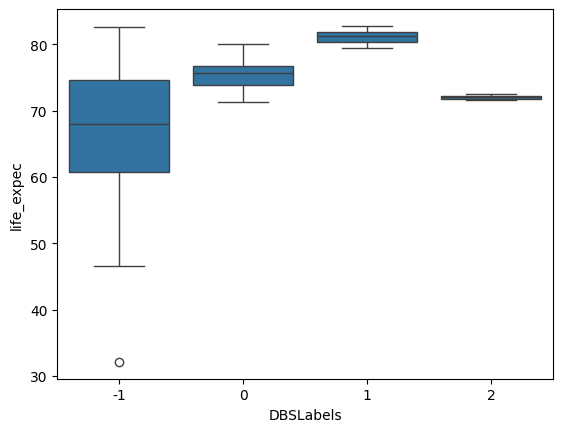

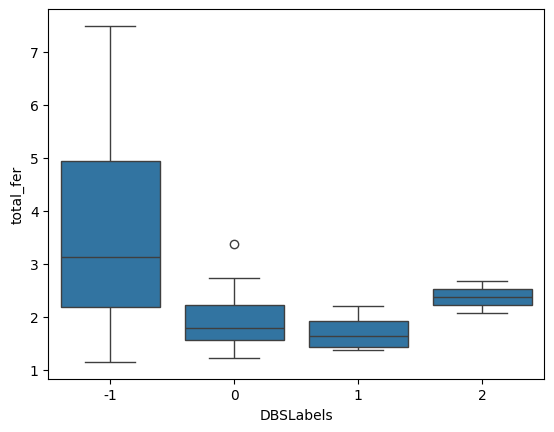

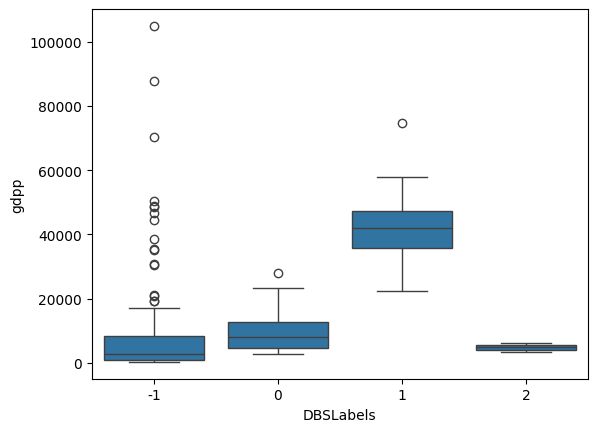

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'DBSLabels', y = col, data = data)

    plt.show()

**Observations**
- We can see that while the three clusters (0, 1, and 2) seem to be way more compact across all attributes, cluster -1 consists of extreme outliers on at least one attribute.
- Therefore, it is not adding any value to our cluster analysis. We can explore it further to understand which type of countries it consists of.

## **Conclusion**

The choice of clustering algorithm here will depend on the context and use case. But purely based on foundations of 'what good clustering looks like', one can propose K-Medoids as it has extreme clusters that are more distinct from each other.